<a href="https://colab.research.google.com/github/mwelland/ENGPHYS_3NM4/blob/main/SHAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exerpts from [Numerical Methods for Engineers](https://mwelland.github.io/ENGPHYS_3NM4/)
Prof. Mike Welland, wellandm@mcmaster.ca

# Linear systems

Linear system solvers are the workhorse of scientific computing, and includes the canonical *solve*.

E.g. the trivial equation for $x$ with scalars $a$ and $b$:

$ax = b$

$x=b/a$

> In contrast: $x^2 = 1$ is nonlinear.

A more complicated example, but still linear, is when you have multiple equations and unknowns:

\begin{align}
a x + b y &= e \\
c x + d y &= f
\end{align}

The goal is to find the $x$ and $y$ that fullfill these equations simultaneously.

In general, if you have as many equations as unknowns, you *might* be able to solve it!

What's the worst that could happen?

## Question 1: Consistent systems

You are organizing a fundraising event and need to buy chairs and tables. Chairs cost \$20 each and tables cost \$50 each. You have a budget of \$700 and need a total of 20 pieces of furniture (chairs and tables combined). How many chairs and tables should you buy?

Let's write this problem mathematicall. Let $c$ and $t$ be the number of chairs and tables respectively.

The budget and pieces equations are,

\begin{align}
20 c + 50 t &= 700 \\
c+t &= 20
\end{align}

Note that these are lines!

\begin{align}
t &= \frac{700-50 c}{20} \\
t &= 20-c
\end{align}

Let's plot them!

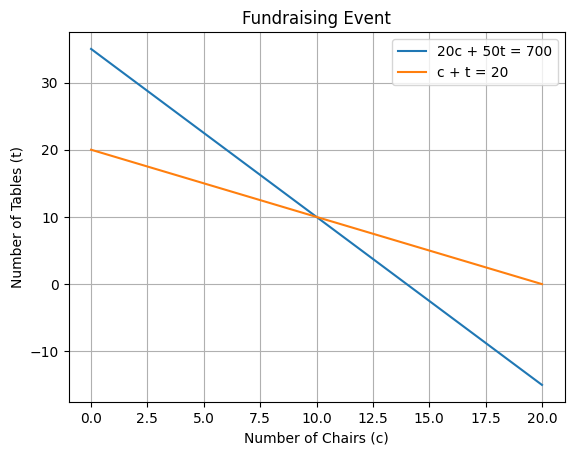

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Define the x values
c = np.linspace(0, 20, 100)

# Calculate the y values for the first equation (20c + 50t = 700)
t1 = (700 - 50 * c) / 20

# Calculate the y values for the second equation (c + t = 20)
t2 = 20 - c

# Plot the lines
plt.plot(c, t1, label='20c + 50t = 700')
plt.plot(c, t2, label='c + t = 20')

# Add labels and title
plt.xlabel('Number of Chairs (c)')
plt.ylabel('Number of Tables (t)')
plt.title('Fundraising Event')

# Add a grid, legend and plot
plt.grid(True)
plt.legend()
plt.show()


## Question 2 - Consistent, dependent systems

There is now a discount on tables down to \$20 each. The customer heard about it and cut your budget to \$400.

The problem is now:

\begin{align}
20c+20t&=400 \\
c+t&=20
\end{align}

Go solve it!

## Question 3 - Inconsistent systems

WOOPS! The customer only has $500! The discount still applies though.

The problem is now

\begin{align}
20 c + 20 t &= 500\\
c+t &= 20
\end{align}

Go solve it!

## Question 4 - Overdetermined systems

The discount is over and the client found the original $700.

BUT, now there is a time crunch! Chairs take 50 minutes to make, tables take 20min and you only have 700 min!

The problem is now

\begin{align}
20 c + 50 t &= 700\\
c+t &= 20 \\
50 c + 20 t &= 700\\
\end{align}

Go solve it!

## Question 5 - The one you'll actually encounter!

Say you only have 600 mintues...

The problem is now

\begin{align}
20 c + 50 t &= 700\\
c+t &= 20 \\
50 c + 20 t &= 600\\
\end{align}

*Can* you solve it?

### The *best* solution

Clearly there isn't a single solution. The system is *inconsistent*. However, we can (uninquely) define the *best* which balances each solution.

In [9]:
import numpy as np

A = np.array([[20, 50],
              [1, 1],
              [50, 20]])

b = np.array([700, 20, 600])

solution, _, _, _ = np.linalg.lstsq(A, b)

display(solution)


array([ 7.61933905, 10.95267238])

# Curve fitting

Curve fitting is a tremendously useful tool both to understand what is happening and what will happen.

You do an experiment (e.g. height vs time) and get data:

| Time (s) | Height (m) |
|---|---|
| 0 | 0 |
| 1 | 5 |
| 2 | 15 |

You want to understand what the height would be at any other time, between or in the future.

What you are actually saying is that $h(t)$, and

\begin{align}
h(0) &= 0 \\
h(1) &= 5 \\
h(2) &= 15
\end{align}

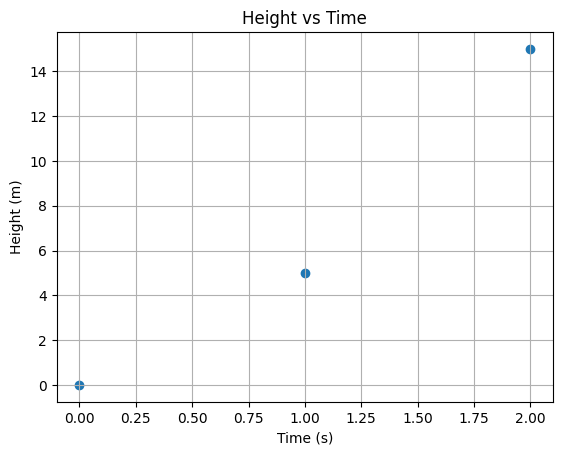

In [10]:
import matplotlib.pyplot as plt

time = [0, 1, 2]
height = [0, 5, 15]

plt.scatter(time, height)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time')
plt.grid(True)
plt.show()

## Fit to a parabola



Okay, well we can use a better curve! Try a parabola:
$$ h = a + b t + c t^2$$

Looking at the data, we can say:

\begin{align}
h(0) = a + b \cdot 0 + c \cdot 0^2 &= 0 \\
h(1) = a + b \cdot 1 + c \cdot 1^2 &= 5 \\
h(2) = a + b \cdot 2 + c \cdot 2^2 &= 15 \\
\end{align}

or,

\begin{align}
h(0) = a &= 0 \\
h(1) = a + b + c  &= 5 \\
h(2) = a + 2b + 4 c &= 15 \\
\end{align}

Behold a linear system for $a$, $b$, and $c$! We know how to solve these!

Parabola fit parameters: a = 0.0, b = 2.5, c = 2.5


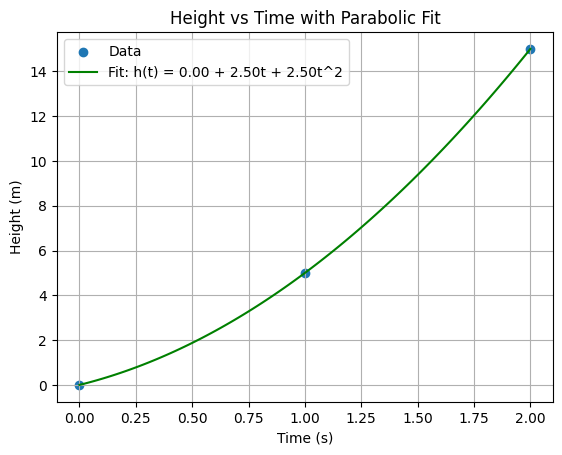

In [11]:
# prompt: Solve the 'fit a parabola case and plot along with the data points

import matplotlib.pyplot as plt
import numpy as np
# We want to fit the model h(t) = a + b*t + c*t^2 to the data points.
# This can be written in matrix form as:
# [[1, time[0], time[0]**2], [1, time[1], time[1]**2], [1, time[2], time[2]**2]] * [a, b, c] = [height[0], height[1], height[2]]
# Let A = [[1, time[0], time[0]**2], [1, time[1], time[1]**2], [1, time[2], time[2]**2]] and x = [a, b, c] and y = [height[0], height[1], height[2]]
# We want to solve Ax = y for x. Since we have as many equations as unknowns, we can use np.linalg.solve.

A_parabola = np.array([[1, time[0], time[0]**2],
                       [1, time[1], time[1]**2],
                       [1, time[2], time[2]**2]])

y_parabola = np.array(height)

parabola_params = np.linalg.solve(A_parabola, y_parabola)

a_parabola, b_parabola, c_parabola = parabola_params

print(f"Parabola fit parameters: a = {a_parabola}, b = {b_parabola}, c = {c_parabola}")

# Plot the original data and the fitted parabola
plt.scatter(time, height, label='Data')
t_range_parabola = np.linspace(min(time), max(time), 100)
plt.plot(t_range_parabola, a_parabola + b_parabola * t_range_parabola + c_parabola * t_range_parabola**2, color='green', label=f'Fit: h(t) = {a_parabola:.2f} + {b_parabola:.2f}t + {c_parabola:.2f}t^2')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time with Parabolic Fit')
plt.grid(True)
plt.legend()
plt.show()

## Fit a line

Assume that
$$ h(t) = a + b t $$

Looking at the data, we can say:

\begin{align}
h(0) = a + b \cdot 0  &= 0 \\
h(1) = a + b \cdot 1  &= 5 \\
h(2) = a + b \cdot 2  &= 15 \\
\end{align}

If we only had two data points, we could fit $a$ and $b$ exactly.

BUT we have 3 data points (or more!) what now?

Least squares fit parameters: a = -0.8333333333333368, b = 7.500000000000002


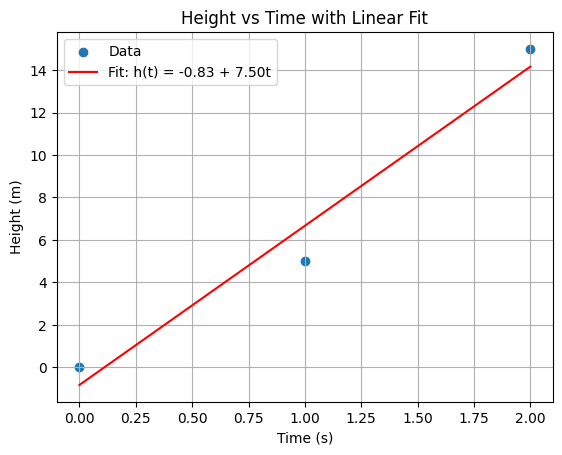

In [12]:
# prompt: do a least squares fit for a and b from the fit a line block

import matplotlib.pyplot as plt
import numpy as np
# We want to fit the model h(t) = a + b*t to the data points.
# This can be written in matrix form as:
# [[1, time[0]], [1, time[1]], [1, time[2]]] * [a, b] = [height[0], height[1], height[2]]
# Let A = [[1, time[0]], [1, time[1]], [1, time[2]]] and x = [a, b] and y = [height[0], height[1], height[2]]
# We want to solve Ax = y for x in a least-squares sense.

A_fit = np.array([[1, time[0]],
                  [1, time[1]],
                  [1, time[2]]])

y_fit = np.array(height)

fit_params, residuals, rank, singular_values = np.linalg.lstsq(A_fit, y_fit, rcond=None)

a_fit, b_fit = fit_params

print(f"Least squares fit parameters: a = {a_fit}, b = {b_fit}")

# Plot the original data and the fitted line
plt.scatter(time, height, label='Data')
t_range = np.linspace(min(time), max(time), 100)
plt.plot(t_range, a_fit + b_fit * t_range, color='red', label=f'Fit: h(t) = {a_fit:.2f} + {b_fit:.2f}t')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time with Linear Fit')
plt.grid(True)
plt.legend()
plt.show()

Is this a good fit? Why / why not?

## Fit to a polynomial

If we have more data, we can *always* use a higher-order polynomial:

$$ h = a + b t + c t^2 + d t^3 + e t^4 ...$$

BUT there is a problem! Use the widget below to see what happens!

### Widget

In [13]:
# Polyfit Model UI and Plot
import numpy as np
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from ipywidgets import VBox, HBox, Button, Text, Label, Output
from IPython.display import display, clear_output
np.random.seed(42)
from ipywidgets import ToggleButtons

poly_function_input = Text(value='np.sin(2 * np.pi * x) * np.exp(-x)', description='Poly f(x):')
poly_save_button = Button(description='Save Poly Function', button_style='success')
degree_selector = ToggleButtons(options=[str(i) for i in range(11)], value='1', description='Degree:')
poly_output = Output()

X = np.linspace(0, 3, 50).reshape(1, -1)

status_label = widgets.Label(value="Press 'Step' to begin training.")

def evaluate_poly_function(expr):
    global poly_y_true
    try:
        poly_y_true = lambda x: eval(expr, {"x": x, "np": np, "sin": np.sin, "cos": np.cos, "exp": np.exp, "pi": np.pi})
        status_label.value = "Poly function saved."
        update_poly_plot()
    except Exception as e:
        status_label.value = f"Error in poly function: {e}"

def update_poly_plot(_=None):
    poly_output.clear_output(wait=True)
    with poly_output:
        try:
            x_pred = np.linspace(-0.5, 3.75, 200)
            x_fit = X.flatten()
            y_fit = poly_y_true(x_fit)
            y_true = poly_y_true(x_pred)

            degree = int(degree_selector.value)
            coeffs = np.polyfit(x_fit, y_fit, degree)
            x_pred2 = np.linspace(-0.5, 4, 200)

            y_pred = np.polyval(coeffs, x_pred2)

            plt.figure(figsize=(6, 4))
            plt.plot(x_pred, y_true, label='True Function')
            plt.plot(x_pred2, y_pred, label=f'Polyfit Degree {degree}')
            plt.legend()
            plt.title("Polynomial Fit (Extended Range)")
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(f"Error in plotting polyfit: {e}")

poly_save_button.on_click(lambda b: evaluate_poly_function(poly_function_input.value))
degree_selector.observe(update_poly_plot, names='value')

# Display Polyfit UI
display(VBox([
    Label("Polynomial Fit Model"),
    HBox([poly_function_input, poly_save_button]),
    degree_selector,
    poly_output
]))

evaluate_poly_function(poly_function_input.value)

# Neural networks

Neural networks are powerful *general* functions - i.e.: they aren't polynomials, trignometric, exponential or anything like that. Their nonlinear structure is flexible enough to capture very complex functions (like language!)

Each internal element has parameters:


*   Edges
*   Neuron activation
*   Neuron bias



Colored_neural_network.svg

How do we find the parameters?

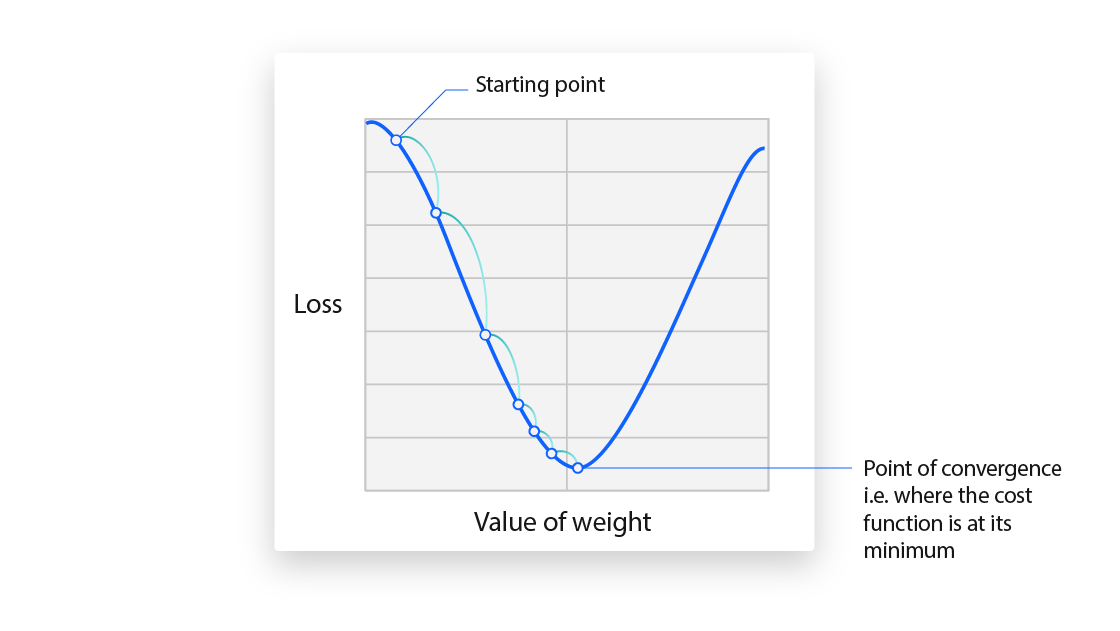

### Widget

In [ ]:
# Polyfit Model UI and Plot
import numpy as np
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from ipywidgets import VBox, HBox, Button, Text, Label, Output
from IPython.display import display, clear_output
np.random.seed(42)
from ipywidgets import ToggleButtons
X = np.linspace(0, 3, 50).reshape(1, -1)

def init_weights():
    global W1, b1, W2, b2
    W1 = np.random.randn(4,1) * 0.5
    b1 = np.random.randn(4,1) * 0.5
    W2 = np.random.randn(1,4) * 0.5
    b2 = np.random.randn(1,1) * 0.5

init_weights()
loss_history = []

def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - np.tanh(x)**2

def forward(X):
    Z1 = W1 @ X + b1
    A1 = tanh(Z1)
    Z2 = W2 @ A1 + b2
    A2 = Z2
    return Z1, A1, Z2, A2

def compute_loss(A2, y): return np.mean((A2 - y)**2)

def backward(X, y, Z1, A1, A2, lr=0.1):
    global W1, b1, W2, b2
    m = X.shape[1]
    dZ2 = (A2 - y) / m
    dW2 = dZ2 @ A1.T
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = dZ1 @ X.T
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

output_plot = widgets.Output()
output_table = widgets.Output()
status_label = widgets.Label(value="Press 'Step' to begin training.")

def plot_nn_diagram():
    layer_x = [0, 2, 4]
    y_positions = [[0], [-3, -1, 1, 3], [0]]
    annotations = []
    shapes = []
    layer_titles = ['x', 'Hidden Layer', 'f(x)']

    for l, ys in enumerate(y_positions):
        for i, y in enumerate(ys):
            shapes.append(dict(type="circle", xref="x", yref="y",
                x0=layer_x[l]-0.2, x1=layer_x[l]+0.2,
                y0=y-0.2, y1=y+0.2, line_color="black"))
            label = 'x' if l==0 else ('y' if l==2 else f'h{i+1}')
            annotations.append(dict(x=layer_x[l], y=y, text=label,
                showarrow=False, font=dict(size=12)))
            if l == 1:
                bias = b1[i, 0]
                annotations.append(dict(x=layer_x[l]+0.3, y=y, text=f"b={bias:.2f}",
                    showarrow=False, font=dict(size=10, color='gray')))
            elif l == 2:
                annotations.append(dict(x=layer_x[l]+0.3, y=y, text=f"b={b2[0,0]:.2f}",
                    showarrow=False, font=dict(size=10, color='gray')))

    for i, y_in in enumerate(y_positions[0]):
        for j, y_hid in enumerate(y_positions[1]):
            weight = W1[j, i]
            shapes.append(dict(type='line', xref='x', yref='y',
                x0=layer_x[0]+0.2, y0=y_in, x1=layer_x[1]-0.2, y1=y_hid,
                line=dict(color='blue')))
            annotations.append(dict(x=1, y=(y_in + y_hid)/2, text=f"{weight:.2f}",
                showarrow=False, font=dict(size=9, color='blue')))

    for j, y_hid in enumerate(y_positions[1]):
        for k, y_out in enumerate(y_positions[2]):
            weight = W2[k, j]
            shapes.append(dict(type='line', xref='x', yref='y',
                x0=layer_x[1]+0.2, y0=y_hid, x1=layer_x[2]-0.2, y1=y_out,
                line=dict(color='red')))
            annotations.append(dict(x=3, y=(y_hid + y_out)/2, text=f"{weight:.2f}",
                showarrow=False, font=dict(size=9, color='red')))

    for i, x in enumerate(layer_x):
        annotations.append(dict(x=x, y=max(y_positions[1])+1.5,
            text=layer_titles[i], showarrow=False, font=dict(size=14)))

    fig = go.Figure()
    fig.update_layout(shapes=shapes, annotations=annotations,
                      xaxis=dict(visible=False), yaxis=dict(visible=False),
                      title='Neural Network Structure', height=500, width=700,
                      margin=dict(l=20, r=20, t=40, b=20))
    fig.show()

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from ipywidgets import VBox, HBox, Button, Text, Label, Output
from IPython.display import display, clear_output

depth = 1
width = 3
activation = np.tanh
activation_derivative = lambda x: 1 - np.tanh(x) ** 2

X = np.linspace(0, 3, 50).reshape(-1, 1)
X2 = np.linspace(0, 3.5, 50).reshape(-1, 1)
true_function = None
losses = []
weights, biases = [], []
weight_history, bias_history = [], []

function_input = Text(value='exp(-x/2)*sin(2*pi*x)', description='f(x):')
save_button = Button(description='Save Function', button_style='success')
reset_button = Button(description='Reset Model', button_style='warning')
status_label = Label()

step_label = Label(value="Step:")
step_1 = Button(description='1')
step_10 = Button(description='10')
step_100 = Button(description='100')
step_1000 = Button(description='1000')
step_10000 = Button(description='10000')

depth_label = Label(value="Change Depth (layers):")
depth_add = Button(description='+1')
depth_sub = Button(description='-1')
width_label = Label(value="Change Width (neurons):")
width_add = Button(description='+1')
width_sub = Button(description='-1')

output_plot = Output()
network_plot = Output(layout={"height": "500px", "overflow": "auto"})
metrics_plot = Output()

def init_model():
    global weights, biases, weight_history, bias_history
    layers = [1] + [width]*depth + [1]
    weights = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers)-1)]
    biases = [np.zeros((1, layers[i+1])) for i in range(len(layers)-1)]
    weight_history = [[] for _ in weights]
    bias_history = [[] for _ in biases]

def forward_pass(x):
    activations = [x]
    zs = []
    a = x
    for w, b in zip(weights[:-1], biases[:-1]):
        z = a @ w + b
        zs.append(z)
        a = activation(z)
        activations.append(a)
    z = a @ weights[-1] + biases[-1]
    zs.append(z)
    activations.append(z)  # no activation on final output
    return zs, activations

def backward_pass(zs, activations, y_true, lr=0.01):
    global weights, biases, weight_history, bias_history
    grads_w = [None] * len(weights)
    grads_b = [None] * len(biases)

    delta = (activations[-1] - y_true)
    grads_w[-1] = activations[-2].T @ delta / len(X)
    grads_b[-1] = np.mean(delta, axis=0, keepdims=True)

    for l in range(2, len(weights)+1):
        z = zs[-l]
        sp = activation_derivative(z)
        delta = (delta @ weights[-l+1].T) * sp
        grads_w[-l] = activations[-l-1].T @ delta / len(X)
        grads_b[-l] = np.mean(delta, axis=0, keepdims=True)

    for i in range(len(weights)):
        weights[i] -= lr * grads_w[i]
        biases[i] -= lr * grads_b[i]
        weight_history[i].append(weights[i].copy())
        bias_history[i].append(biases[i].copy())

    return np.mean((activations[-1] - y_true)**2)

def step(n=1):
    global losses
    if true_function is None: return
    y_true = true_function(X)
    for _ in range(n):
        zs, activations = forward_pass(X)
        loss = backward_pass(zs, activations, y_true)
        losses.append(loss)
    update_plots()

def reset_model(_=None):
    init_model()
    losses.clear()
    status_label.value = "Model reset."
    update_plots()

def save_function(_=None):
    global true_function, losses
    try:
        code = function_input.value
        true_function = lambda x: eval(code, {"x": x, "np": np, "sin": np.sin, "cos": np.cos, "exp": np.exp, "pi": np.pi})
        losses.clear()
        status_label.value = "Function saved."
        update_plots()
    except Exception as e:
        status_label.value = f"Error: {e}"

def change_depth(d):
    global depth
    depth = max(0, depth + d)
    reset_model()

def change_width(d):
    global width
    width = max(1, width + d)
    reset_model()

save_button.on_click(save_function)
reset_button.on_click(reset_model)
step_1.on_click(lambda b: step(1))
step_10.on_click(lambda b: step(10))
step_100.on_click(lambda b: step(100))
step_1000.on_click(lambda b: step(1000))
step_10000.on_click(lambda b: step(10000))
depth_add.on_click(lambda b: change_depth(1))
depth_sub.on_click(lambda b: change_depth(-1))
width_add.on_click(lambda b: change_width(1))
width_sub.on_click(lambda b: change_width(-1))

def draw_network(activations):
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors

    G = nx.DiGraph()
    labels = {}
    pos = {}
    edge_labels = {}
    edge_colors = {}
    layer_sizes = [1] + [width] * depth + [1]

    for l, size in enumerate(layer_sizes):
        for n in range(size):
            node = f"L{l}N{n}"
            pos[node] = (l, -n)
            G.add_node(node)

            # Set labels
            if l == 0:
                labels[node] = "x"
            elif l == len(layer_sizes) - 1:
                labels[node] = "f(x)"
            else:
                try:
                    act_val = activations[l][0, n]
                    bias_val = biases[l - 1][0, n]
                    labels[node] = f"{act_val:.2f}\nb={bias_val:.2f}"
                except Exception:
                    labels[node] = f"H{l-1}N{n}"

            # Add edges
            if l > 0:
                for p in range(layer_sizes[l - 1]):
                    prev_node = f"L{l-1}N{p}"
                    G.add_edge(prev_node, node)
                    w_val = weights[l - 1][p, n]
                    edge_labels[(prev_node, node)] = f"{w_val:.2f}"
                    norm_val = np.tanh(w_val)  # for color mapping
                    edge_colors[(prev_node, node)] = plt.cm.bwr((norm_val + 1) / 2)

    return G, pos, labels, edge_labels, edge_colors


def update_plots():
    output_plot.clear_output(wait=True)
    metrics_plot.clear_output(wait=True)
    network_plot.clear_output(wait=True)
    with output_plot:
        if true_function:
            plt.figure(figsize=(6, 3))
            y_true = true_function(X)
            _, activations = forward_pass(X2)
            y_pred = activations[-1]
            plt.plot(X, y_true, label='True')
            plt.scatter(X2, y_pred, label='NN')
            plt.legend()
            plt.title("Function vs NN Output")
            plt.grid(True)
            plt.show()

    with metrics_plot:
        if losses:
            plt.figure(figsize=(6, 3))
            plt.plot(losses, label="Loss", color='red')
            for i, history in enumerate(weight_history):
                flat_vals = [w.flatten()[0] for w in history]
                plt.plot(flat_vals, label=f"W{i}_0", alpha=0.5)
            for i, history in enumerate(bias_history):
                flat_vals = [b.flatten()[0] for b in history]
                plt.plot(flat_vals, label=f"b{i}_0", linestyle='dotted', alpha=0.5)
            plt.title("Loss and Parameter Changes")

            plt.grid(True)
            plt.legend()
            plt.show()
    with network_plot:
        if true_function:
            activations = forward_pass(X)  # Ensure activations are defined
            G, pos, labels, edge_labels, edge_colors = draw_network(activations)
            edge_color_vals = [edge_colors.get(edge, '#888888') for edge in G.edges()]
            nx.draw(G, pos, labels=labels, node_color='lightblue', node_size=600,
                    edge_color=edge_color_vals, edge_cmap=plt.cm.bwr, arrows=True)
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
            plt.title("Neural Network Diagram")
            plt.show()

top_controls = HBox([function_input, save_button, reset_button])
step_controls = HBox([step_label, step_1, step_10, step_100, step_1000, step_10000])
depth_controls = HBox([depth_label, depth_sub, depth_add])
width_controls = HBox([width_label, width_sub, width_add])
graph_row = HBox([output_plot, metrics_plot])
full_ui = VBox([top_controls, status_label, step_controls, depth_controls, width_controls, network_plot, graph_row])
display(full_ui)

init_model()
update_plots()
